### Base Learner 3

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
my_params = {'_train_seed':1, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50}
default_params.update(my_params)

In [3]:
set_seed(42)

In [4]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True)

In [5]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,1.983150,0.135919,0.973868,0.994774,0.980836,00:11
1,0.946324,0.096775,0.987805,0.996516,0.991289,00:10
2,0.647351,0.089071,0.987805,0.994774,0.993031,00:10
3,0.481447,0.090564,0.991289,0.996516,0.994774,00:10
4,0.374796,0.082550,0.993031,0.996516,0.996516,00:10
5,0.295678,0.074385,0.993031,0.996516,0.996516,00:10
6,0.234867,0.084952,0.993031,0.996516,0.996516,00:10
7,0.217707,0.086821,0.993031,0.996516,0.996516,00:10
8,0.210087,0.088468,0.993031,0.996516,0.996516,00:10
9,0.193148,0.087696,0.993031,0.996516,0.996516,00:10


In [6]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.740929,0.473684,0.894737,0.557018
1,1.459387,0.600877,0.921053,0.644737
2,1.382061,0.592105,0.899123,0.662281
3,1.146677,0.622807,0.921053,0.679825
4,1.130238,0.688596,0.960526,0.728070
5,1.059315,0.671053,0.947368,0.697368
6,1.044439,0.692982,0.956140,0.728070
7,1.052671,0.688596,0.929825,0.732456
8,1.015308,0.692982,0.947368,0.728070
9,0.998112,0.692982,0.938596,0.732456


In [22]:
old_path = learn.path
learn.path = Path('../models')
learn.export('resnet34-fit10-2.pkl')
learn.path = old_path

In [14]:
# learn = load_learner('../models/resnet34-fit10.pkl')

In [7]:
set_seed(42)
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.283246,0.115178,0.987805,0.993031,0.994774,00:10


epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.256552,0.101521,0.993031,0.996516,0.996516,00:14
1,0.242112,0.088393,0.993031,0.996516,0.996516,00:14
2,0.223228,0.098847,0.991289,0.994774,0.996516,00:14
3,0.242476,0.104119,0.993031,0.996516,0.996516,00:14
4,0.205674,0.095840,0.993031,0.996516,0.996516,00:14
5,0.219774,0.090089,0.993031,0.996516,0.996516,00:14
6,0.203490,0.109734,0.987805,0.993031,0.994774,00:14
7,0.157898,0.088890,0.991289,0.994774,0.996516,00:14
8,0.144712,0.075652,0.991289,0.996516,0.994774,00:14
9,0.117272,0.089036,0.993031,0.996516,0.996516,00:14


In [8]:
pd.DataFrame(learn.cbs[3].values).iloc[-15:,:]

,0,1,2,3
11,1.129599,0.688596,0.938596,0.745614
12,0.855765,0.754386,0.951754,0.811404
13,0.857572,0.736842,0.960526,0.767544
14,0.785869,0.785088,0.929825,0.837719
15,0.891659,0.771930,0.951754,0.824561
16,0.750827,0.767544,0.969298,0.811404
17,0.649574,0.820175,0.964912,0.855263
18,0.714952,0.785088,0.964912,0.811404
19,0.610497,0.820175,0.947368,0.868421
20,0.518285,0.877193,0.978070,0.894737


In [13]:
old_path = learn.path
learn.path = Path('../models')
learn.export('resnet34-fit10-tune15.pkl')
learn.path = old_path

In [9]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

In [10]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

In [11]:
interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       0.94      0.89      0.91        18
  black-king       1.00      0.84      0.91        19
black-knight       0.82      0.95      0.88        19
  black-pawn       0.68      1.00      0.81        19
 black-queen       0.89      0.85      0.87        20
  black-rook       1.00      0.89      0.94        19
white-bishop       1.00      0.79      0.88        19
  white-king       0.80      0.84      0.82        19
white-knight       0.82      0.95      0.88        19
  white-pawn       0.90      1.00      0.95        19
 white-queen       1.00      0.32      0.48        19
  white-rook       0.76      1.00      0.86        19

    accuracy                           0.86       228
   macro avg       0.88      0.86      0.85       228
weighted avg       0.88      0.86      0.85       228



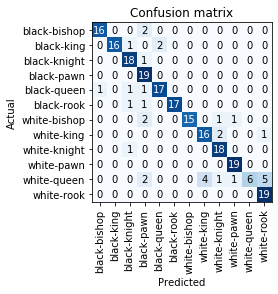

In [12]:
interp.plot_confusion_matrix()